# Project: Investigate The FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.census.gov/).
- The <u>'NICS data</u>' is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
- The <u>'U.S. census data</u>' is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

In [2]:
# set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

## Gathering Data

In [3]:
# Load your data
df_gun=pd.read_excel('gun_data.xlsx',sheet_name='Sheet1')
df_census=pd.read_csv('U.S. Census Data.csv')

In [4]:
# print the first 5 rows of gun dataset
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
# print the first 5 rows of census dataset
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


## Asking Questions
- What is the average revenue of firms of all the states in 2012?
- What is the average revenue of men-owned and women-owned firms of all the states in 2012?which bigger and how much ?
- Which states have had the highest growth in gun registrations?
- What is the overall trend of gun purchases?
- How many guns were registered in total in April, 2006?
- What type of gun has highest quantity, and the relationship to totals?
- What is the sum of registered gun in each state over time?Which state highest?And how many?

## Assessing Data

In [6]:
# print the information of gun dataset(number of columns and rows , datatype for each column , missing values)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
# print the information of census dataset(number of columns and rows , datatype for each column , missing values)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

### Check for Duplicated Data

In [8]:
# check for duplicates in the gun dataset
df_gun.duplicated().sum()

0

In [9]:
# check for duplicates in the census dataset
df_census.duplicated().sum()

3

### Check for Null Values

In [10]:
# check which columns have NaN values in the gun dataset
df_gun.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [11]:
# check how many NaN values fior each column in the gun dataset
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [12]:
# check which columns have NaN values in the census dataset
df_census.isnull().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [13]:
# check how many NaN values fior each column in the census dataset
df_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [14]:
# display descriptive statstics for the gun dataset
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [15]:
# display descriptive statstics for the census dataset
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Persons under 18 years, percent, April 1, 2010",(c),"""01""",7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,0.103,0.048,50.40%,2.50%,1.90%,5.10%,12.30%,1.50%,"$28,340",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


## Data Cleaning

#### use `cpoy` function to make a copy for each dataframe before making cleaning

In [16]:
# make a copy from gun dataset
df_gun_clean=df_gun.copy()
# confirm the copy
df_gun_clean.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [17]:
# make a copy from census dataset
df_census_clean=df_census.copy()
# confirm the copy
df_census_clean.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Drop Duplicates from the census dataset

In [18]:
# drop duplicates
df_census_clean.drop_duplicates(inplace=True)

# confirm changes
df_census_clean.duplicated().sum()

0

#### use ` rename` function to change columns name to lowercase and replace space with underscore in the census dataset

In [19]:
# rename columns in the census dataset
df_census_clean.rename(columns= lambda x:x.lower().replace(" ","_"),inplace=True)

# confirm changes
df_census_clean.columns

Index(['fact', 'fact_note', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new_hampshire', 'new_jersey', 'new_mexico',
       'new_york', 'north_carolina', 'north_dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia',
       'washington', 'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

#### Cleaning NaN Values

In [20]:
# convert columns Datatypes in the census dataset from String to Numerical(Float)
# convert all columns except the first 2 columns
cols=df_census_clean.iloc[:,2:].columns
for col in cols:
    df_census_clean[col]=df_census_clean[col].str.extract('(\d+)').astype(float)
    
#confirm changes
df_census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
fact              80 non-null object
fact_note         28 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

In [21]:
# replace NaN values with 'No record' in the census dataset because the numerical type of NaN values 
# as each row has specific meaning, thus we can't fill them with mean
df_census_clean.fillna('No record',inplace=True)

#confirm changes
df_census_clean.isnull().any().any() , df_census_clean.isnull().sum().sum()

(False, 0)

In [22]:
# replace NaN values with mean value for each column in the gun dataset
cols=df_gun_clean.iloc[:,np.r_[2:7,8:26]].columns
for col in cols:
    col_mean=df_gun_clean[col].mean()
    df_gun_clean[col].fillna(col_mean,inplace=True)
    
# confirm changes
df_gun_clean.isnull().any().any() , df_gun_clean.isnull().sum().sum()

(False, 0)

### convert `month` column from String to Datetime

In [23]:
#convert month column in the gun dataset from String to Datetime
df_gun_clean.month=pd.to_datetime(df_gun_clean.month)

#confirm changes
df_gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
ret

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I'M ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### Research Question 1 : What is the average revenue of firms of all the states in 2012?

In [24]:
# average revenue of all firms of all the states in 2012
all_firms_2012=df_census_clean.query('fact == "All firms, 2012"')
all_firms_mean= all_firms_2012.iloc[:,2:].mean().mean()
all_firms_mean

133749.26

 >The average revenue of All firms of all the states in 2012 is around 133749.26 dollor.

### Research Question 2 : What is the average revenue of men-owned and women-owned firms of all the states in 2012?which bigger and how much ?

In [25]:
# average revenue of men-owned firms of all the states in 2012
men_firms_2012=df_census_clean.query('fact == "Men-owned firms, 2012"')
men_mean= men_firms_2012.iloc[:,2:].mean().mean()
men_mean

74440.58

 >The average revenue of Men-owned firms of all the states in 2012 is around 74440.58 dollar.

In [26]:
# average revenue of women-owned firms of all the states in 2012
women_firms_2012=df_census_clean.query('fact == "Women-owned firms, 2012"')
women_mean= women_firms_2012.iloc[:,2:].mean().mean()
women_mean

46398.02

>The average revenue of Women-owned firms of all the states in 2012 is around 46398.02 dollar.

In [27]:
# difference between average revenue of Men-owned and Women-owned firms
mean_diff=men_mean - women_mean
mean_diff

28042.560000000005

>The average revenue of Men-owned firms is greater than Women-owned firms of all the states in 2012 by around 28042.56 dollar.

### Research Question 3 : Which states have had the highest growth in gun registrations?

#### use `groupby` function to get `totals` in each state and each month

In [28]:
df_gun_total=df_gun_clean.groupby(['month','state'])['totals'].sum()

In [29]:
# get the latest and earliest date
latest_date=df_gun_clean.month.max()
early_date=df_gun_clean.month.min()

In [30]:
# find growth amount for each state
df_gun_grow = df_gun_total.loc[latest_date] - df_gun_total.loc[early_date]

# find highest growth state
df_gun_grow.idxmax()

'Kentucky'

In [31]:
# find highest growth amount
df_gun_grow.max()

397866

> 'kentucky' state has the highest growth amount in gun registrations , and total registed number of guns is 397866

### Research Question 4 : What is the overall trend of gun purchases?

#### use `groupby` function to get summation of `totals` each month

In [32]:
# get summation of 'total' for each month
df_gun_trend=df_gun_clean.groupby('month').totals.sum()

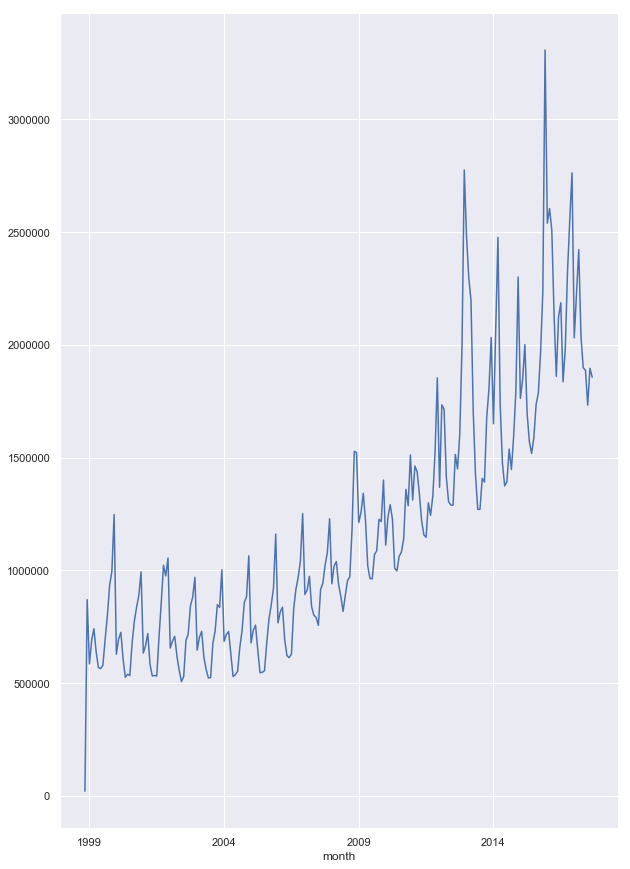

In [136]:
# figure out the overall trend
df_gun_trend.plot(figsize=(10,15))

> the overall trend of gun purchases is increasing.

### Research Question 5 : How many guns were registered in total in April, 2006?

In [36]:
# get totals of april
total_gun_april=df_gun_clean.query('month == "2006-04-01"')
# find summation of totals of april
sum_gun_april=total_gun_april.groupby('month').totals.sum().tolist()[0]

# get totals of april
total_gun_may=df_gun_clean.query('month == "2006-05-01"')
# find summation of totals of april
sum_gun_may=total_gun_may.groupby('month').totals.sum().tolist()[0]
sum_gun_april , sum_gun_may

(693232, 622547)

In [37]:
# find total registed guns in in April, 2006
registed_gun_april = sum_gun_april - sum_gun_may
registed_gun_april

70685

> the total  registed guns in in April, 2006 were 70685 pieces

### Research Question 6 : What type of gun has highest quantity, and the relationship to totals?

In [38]:
# find highest quantity type of gun
gun_type={}
cols=df_gun_clean.columns[2:25]
for col in cols:
    gun_type[col]=df_gun_clean[col].sum()
    
max(gun_type , key=gun_type.get)

'long_gun'

In [39]:
month_data = df_gun_clean.month.dt.strftime("%B")

df_test = df_gun_clean.copy()

df_test['registed_month']= month_data

#### import `calendar` package to order months

In [52]:
import calendar
#get list of months in order
month_order=[mon for mon in calendar.month_name][1:]
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


### Plot the relation between highest quantity type of gun and totals

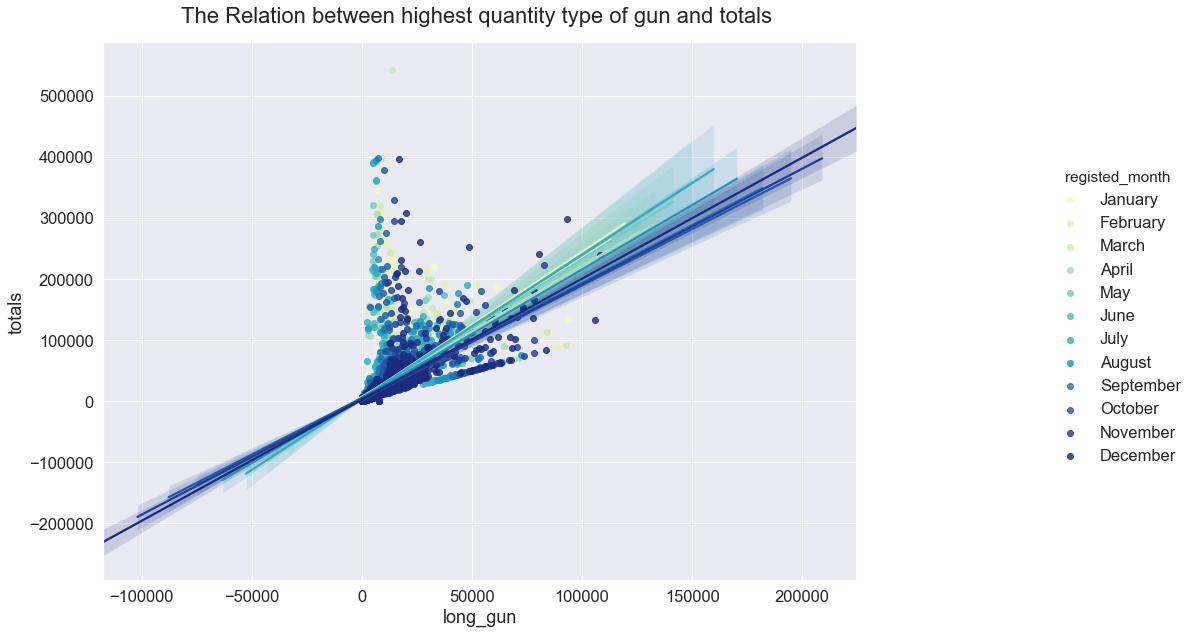

In [114]:
# set fontsize
sns.set(font_scale = 1.5)
# figure out the relation between highest quantity type of gun and totals
gun_total_fig=sns.lmplot(x='long_gun',y='totals',hue='registed_month',data=df_test,aspect=12/9,hue_order=month_order,palette='YlGnBu')
# set plot dimensions
gun_total_fig.fig.set_size_inches(20,10)
# set plot title and size
gun_total_fig.fig.suptitle("The Relation between highest quantity type of gun and totals",fontsize=22)
sns.set()

### Research Question 7 : What is the sum of registered gun in each state over time?Which state highest?And how many?

#### use `groupby` function to get summation of `totals` for each `state`

In [41]:
# sum of 'totals' for each 'state'
total_state_gun=df_gun_clean.groupby('state').totals.sum()
total_state_gun

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

In [42]:
# find highest registered gun state
total_state_gun.idxmax()

'Kentucky'

In [43]:
# find amount of highest registered gun state
total_state_gun.max()

29762434

> 'kentucky' state has the highest amount in gun registrations , and total registed number of guns is 29762434 pieces

#### Define `makebar` function to make a bar plot

In [133]:
def makebar(df,xVar):
    """
    paramters : df is the dataframe is use in  the plot to get a distributions or relationships
                xVar is the distribution or relationship
    steps:      - specify the dataframe and kind of plot and some properties
                - add title to the plot and format it
                - add x label to the plot and format it
                - add y label to the plot and format it
                
    output:     draw a horizontal bar for a specific dataframe and relationship
    """
    # draw horizontal bar
    df.plot(kind='barh',figsize=(10,15),width=0.7,edgecolor="black")
    # add title and format it
    plt.title(f"Distribution of {xVar}".title(),fontsize=16,weight="bold")
    #add x label and format it
    plt.xlabel(xVar.title(),fontsize=12,weight="bold")
    #add x label and format it
    plt.ylabel('State'.title(),fontsize=12,weight="bold")

### Plot Total guns for each state 

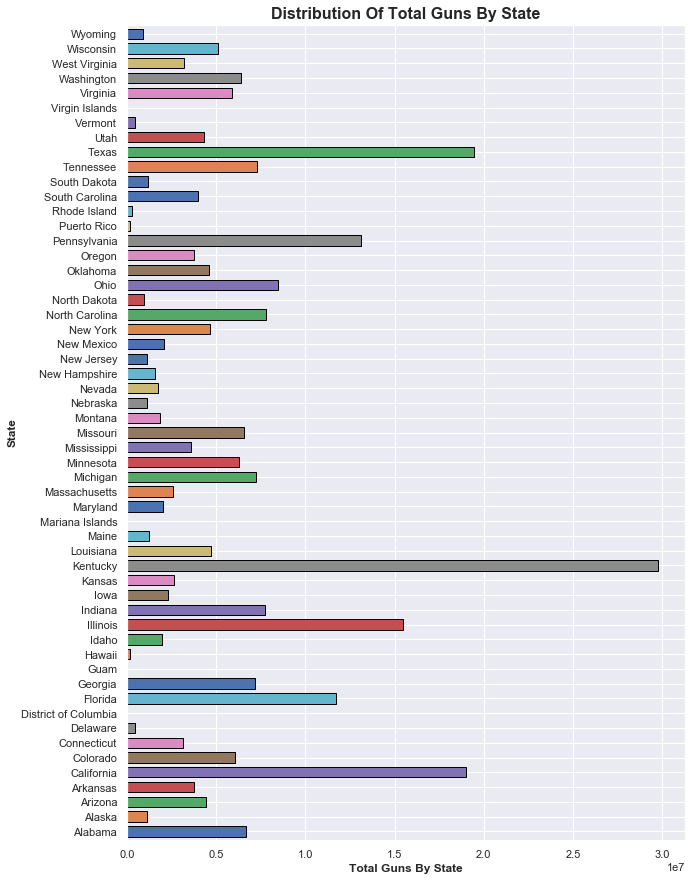

In [134]:
makebar(total_state_gun,"Total Guns By State")

> 'kentucky' state has the highest amount in gun registrations.

### Plot growth in gun registrations for each state

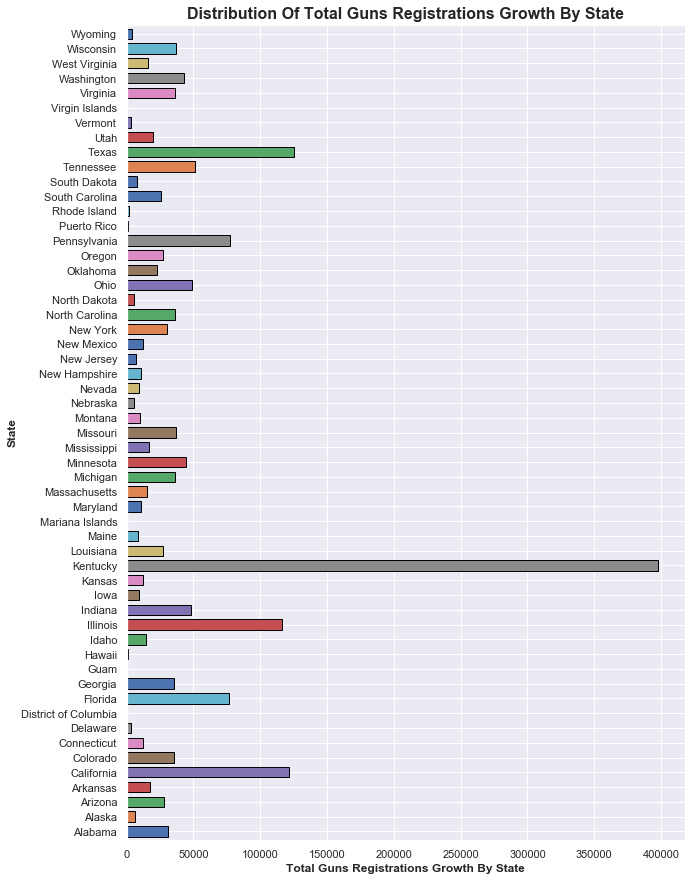

In [135]:
makebar(df_gun_grow,"Total Guns Registrations Growth By State")

> 'kentucky' state has the highest growth amount in gun registrations 

### Plot the average revenue of firms of all the states in 2012

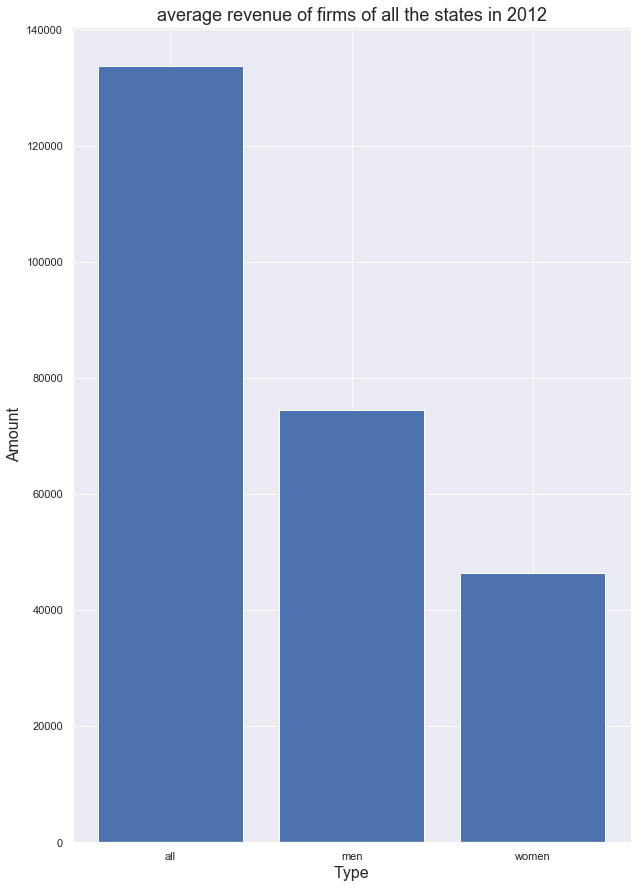

In [138]:
# set figure size
plt.figure(figsize=(10,15))
# specify the x-coordinates of the bars, the heights of the bars and the x tick labels
plt.bar([1, 2, 3], [all_firms_mean, men_mean, women_mean], tick_label=['all', 'men', 'women'])
# add title and format it
plt.title('average revenue of firms of all the states in 2012',fontsize=18)
# add x label and format it
plt.xlabel('Type',fontsize=16)
# add y label and format it
plt.ylabel('Amount',fontsize=16);

<a id='conclusions'></a>
## Conclusions

> The dataset included 2 tables, but they have to be loaded by different measures. The data was ranging from 1998 to 2017, which consisted of detailed information of registered gun. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis.

## Limitations
>The limitations of current study data was seperated into two tables which could affect the process of analysis. On the other hand, the population estimation were only recorded for 2010 and 2016, which limit some analysis to a small range.

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295